# Calendar method

---
Use last cycle's ovulation date as guess for this one.

In [1]:
%pylab --no-import-all inline

from os import path
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
file = path.join("..", "data", "processed", "df.csv")
df = pd.read_csv(file, index_col=0)

In [3]:
calendar_guess = df.groupby(['ID', 'GROUP_ID'])['L_PREOVULATION'].apply(lambda x: x.shift(1))

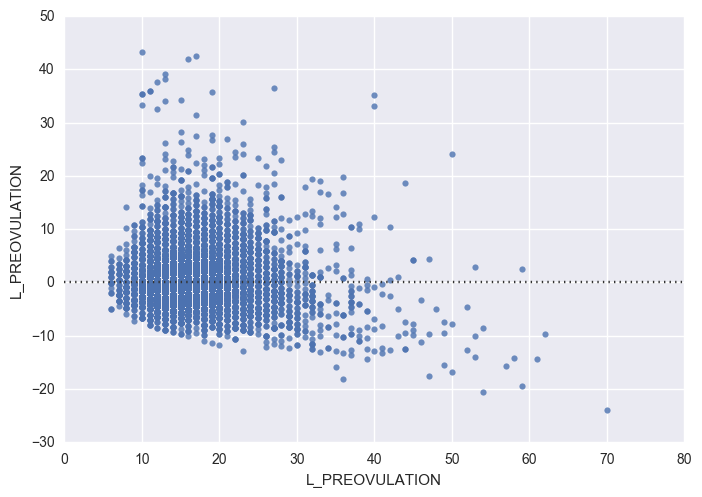

In [4]:
sns.residplot(x=df.L_PREOVULATION, y=calendar_guess, order=0);

In [5]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join("..", 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport visualization.visualize
from visualization.visualize import modified_bland_altman_plot

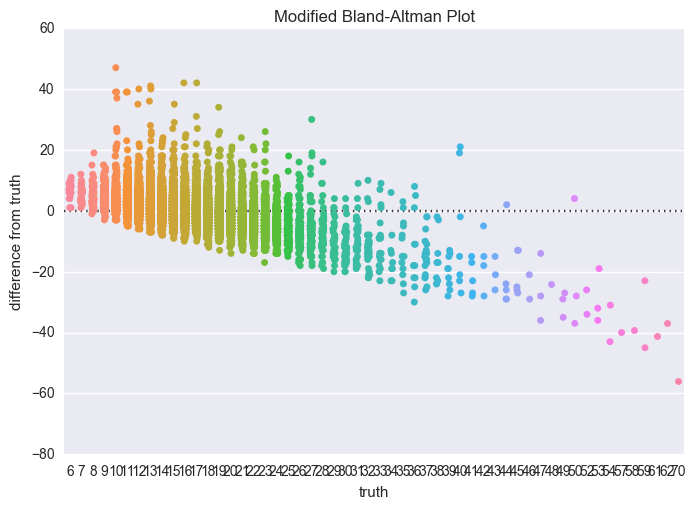

In [6]:
modified_bland_altman_plot(calendar_guess, df.L_PREOVULATION);

In [7]:
from sklearn.metrics import mean_squared_error
data = df
data['GUESS'] = calendar_guess
data.dropna(subset=['GUESS'], inplace=True)
mean_squared_error(data.L_PREOVULATION, data.GUESS)

19.133741648106906